#Derivadas do *Backpropagation* em Redes Neurais Convolucionais (CNN)

Texto original: [Clique aqui!](https://www.semanticscholar.org/paper/Derivation-of-Backpropagation-in-Convolutional-(-)-Zhang/5d7911c93ddcb34cac088d99bd0cae9124e5dcd1)


Traduzido e adaptado por [Carlos Anderson](mailto:calicinio@gmail.com)

![Esquema da CNN e seus parâmetros](https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/5d7911c93ddcb34cac088d99bd0cae9124e5dcd1/1-Figure1-1.png)

##Feedforward - propagação dos pixels da imagem

### Inicialização dos parâmetros


---


Os parâmetros são:

Camada C1 (layer C1): $ {k}^{1}_{1,p}$ (dimensão 5 x 5 ) e ${b}^{1}_{p}$ (dimensão 1 × 1),  sendo $p = 1, 2, ... 6 $ ;

Camada C2 (layer C2): $ {k}^{2}_{p,q}$ (dimensão 5 x 5 ) e ${b}^{2}_{q}$ (dimensão 1 × 1),  sendo $q = 1, 2, ... 12 $ ;

Camada FC (layer FC): $W$  (dimensão 10 x 192 ) e $b$  (dimensão 10 x 1 ).

Todos os valores de *bias* ($ {b}^{1}_{p} , {b}^{2}_{q}$ e $b$ )  são inicializados com o valor 0; 

Os outros parametros (${k}^{1}_{1,p},  {k}^{2}_{p,q}$ e $W$) são inicializados a partir de uma distribuição uniforme baseada na dimemsão de ${k}^{1}_{1,p} $ e ${k}^{2}_{p,q}$ e o número de entradas e saída de cada camada. Assim, temos:

$ {k}^{1}_{1,p} \sim U{\pm \sqrt{ 6 \over (1+6) \times 5^{2} }} $

${k}^{2}_{p,q} \sim U{\pm \sqrt{ 6 \over (6+12) \times 5^{2} }} $

$W \sim U{\pm \sqrt{ 6 \over 192+10 }} $

O número total de parâmetros é:

\begin{array}{rc|c}
Parâmetros & Total & Camada \\
(5 × 5 + 1) × 6 & 156 & C1 \\ 
(5 × 5 × 6 + 1) × 12 & 1812  & C2 \\
10 × 192 + 10 & 1930 & FC \\ 
\hline
Total& 3898 & \\
\end{array}

Total de parâmetros de C1: 156
Total de parâmetros em C2: 1812
Total de parâmetros em FC: 1930

 -> Kernels da primeira camada (C1) <-


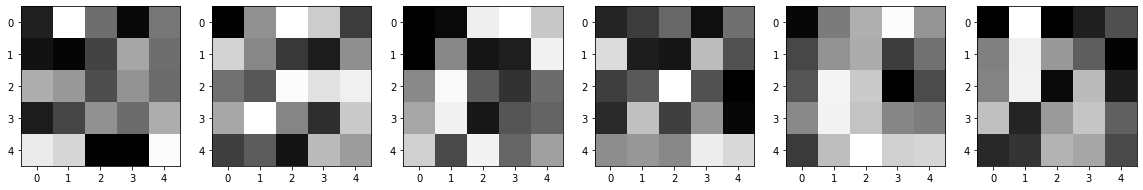

In [3]:
#importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


#variaveis de controle de dimensão
p = 6;
q = 12;


#inicializando os parâmetros
k1 = np.random.uniform(1,6,(5, 5, p))
b1 = np.zeros((1, p))
print("Total de parâmetros de C1: " + str(k1.size + b1.size))

k2 = np.random.uniform(6,12,(5, 5, p, q))
b2 = np.zeros((1, q))
print("Total de parâmetros em C2: " + str(k2.size + b2.size))

W = np.random.uniform(-1,1,(10, 192))
b = np.zeros((10, 1))
print("Total de parâmetros em FC: " + str(W.size + b.size))


#plotando os kernels da primeira camada (C1)
plt.figure(figsize=(20,10))
print('\n -> Kernels da primeira camada (C1) <-')
for i in range(0, p):
  plt.subplot(1,p,i+1)
  plt.imshow(k1[:,:,i], cmap='gray')

### Convolução da camada C1


---


$$ {C}^{1}_{p}  = \sigma \left ( I * {k}^{1}_{1,p} + {b}^{1}_{p} \right ) \\ \sigma (x) = \frac{1}{1 + {exp}^{-x}} $$

$$ {C}^{1}_{p}(i,j) = \sigma \left ( \sum^{2}_{u=-2} \sum^{2}_{v=-2} I ( i - u, j - v) \cdot {k}^{1}_{1,p} (u,v) + {b}^{1}_{p} \right ) $$

onde:
* $p = 1, 2, 4 ... 6$, porque são $6$ mapas de características (*kernels*) na camada C1;
* \* denota convolução;
* $i$ e $j$ são os índices das linhas e colunas do mapa de característica.

Devido as bordas de cada $kernel$ até seu centro, com a convolução da imagem $I$, que tem tamanho 28x28 pixels, a imagem da camada ${C}^{1}_{p}$ tem 24x24 pixels, haja vista que cada daquele tem dimensão de 5x5 pixels.


11501568/11490434 [==============================] - 0s 0us/step


[]

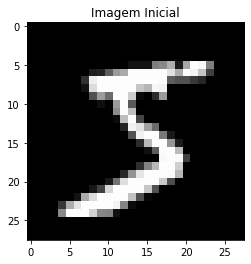

In [4]:
#método da função exponecial sigma
def sigma(x):
  return 1 / (1 + np.exp(-x));
#################################################

#metódo que convolução de matrizes 2D COM sigma e bias
def convolution2d(image, kernel, bias):
  
  m, n = kernel.shape
  
  #apenas para kernels quadrados
  if (m == n):
    y, x = image.shape
    y = y - m + 1
    x = x - m + 1
    
    new_image = np.zeros((y,x))
    
    for i in range(y):
      for j in range(x):
        new_image[i][j] = sigma(np.sum(image[i:i+m, j:j+m]*kernel) + bias)

    return new_image
  else:
    return false
##################################################

#metódo de convolução da camada C1
def convolution_C1( I, k1, b1 ):
  
  c1 = np.zeros((24, 24, 6))
  for p in range(0, b1.size):
    c1[:,:,p] = convolution2d( I, k1[:,:,p], b1[:,p] )
  
  return c1;

##################################################

#I = np.random.uniform(1,0,(28, 28))

from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
I = x_train[0]

plt.title('Imagem Inicial')
plt.imshow(I, cmap='gray')
plt.plot()



[]

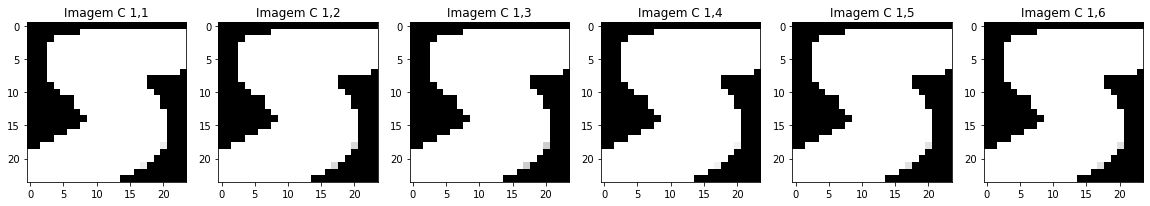

In [6]:
C1 = convolution_C1(I, k1, b1)

plt.figure(figsize=(20,10))
for i in range(0, C1[0,0,:].size ):
  plt.subplot(1, C1[0,0,:].size, i+1)
  plt.imshow(C1[:,:,i], cmap='gray')
  plt.title('Imagem C 1,'+str(i+1))
  
plt.plot()

### Pooling da camada S1


---



$$  S^{1}_{p}(i, j) = \frac{1}{4} \sum^{1}_{u=0} \sum^{1}_{v=0} {C}^{1}_{p}  \left ( 2i - u, 2j - v \right ), i, j = 1, 2, 3, 4, ... , 12  $$

O pooling aqui consiste em somar os valores dos pixels de blocos com dimensões de 2x2 pixel e tirar a média deste valor. Logo, as imagens da camda C1, que possum dimensão 24x24, após o polling, passam a ter dimensão de 12x12 pixels.

[]

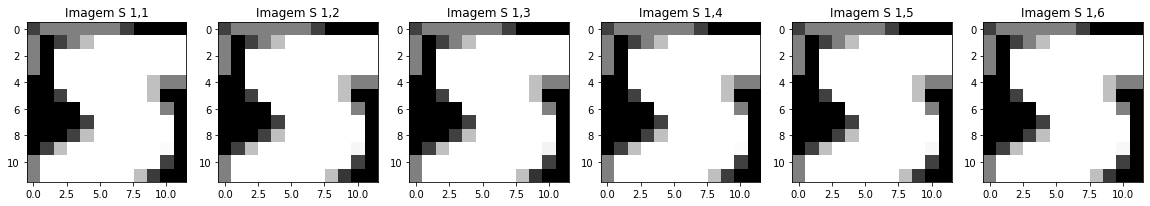

In [7]:
# realiza Pooling das imagens da camada C1 - versão SEM loop para u e v
def pooling_C1_v2(C1):
  
  s1 = np.zeros((12,12, 6))
  
  for p in range(0, 6):
    for i in range(0, 12):
      for j in range(0, 12):
        s1[i, j, p] = C1[ 2*i - 0, 2*j - 0, p ] + s1[i, j, p];
        s1[i, j, p] = C1[ 2*i - 0, 2*j - 1, p ] + s1[i, j, p];
        s1[i, j, p] = C1[ 2*i - 1, 2*j - 0, p ] + s1[i, j, p];
        s1[i, j, p] = C1[ 2*i - 1, 2*j - 1, p ] + s1[i, j, p];
        s1[i, j, p] = s1[i, j, p] * (1/4);  
  
  return s1

#######################################################################

# realiza Pooling das imagens da camada C1 - versão COM loop para u e v
def pooling_C1(C1):
  
  s1 = np.zeros((12,12, 6))
  
  for p in range(0, 6):
    for i in range(0, 12):
      for j in range(0, 12):
        for u in range(0, 2):
          for v in range(0, 2):
            s1[i, j, p] = C1[ 2*i - u, 2*j - v, p ] + s1[i, j, p];        
  
  s1 = s1 * 1/4
  
  return s1

########################################################################

S1 = pooling_C1(C1)

plt.figure(figsize=(20,10))
for i in range(0, S1[0,0,:].size ):
  plt.subplot(1, S1[0,0,:].size, i+1)
  
  plt.imshow(S1[:,:,i], cmap='gray')
  
  plt.title('Imagem S 1,'+str(i+1))
  
plt.plot()

### Convolução da camada C2


---



$$ {C}^{2}_{q}  = \sigma \left ( \sum^{6}_{p=1} S^{1}_{p} * {k}^{2}_{p,q} + {b}^{2}_{q} \right ) $$

$$ {C}^{2}_{q}(i,j) = \sigma \left ( \sum^{6}_{p=1} \sum^{2}_{u=-2} \sum^{2}_{v=-2}  S^{1}_{p} ( i - u, j - v) \cdot {k}^{2}_{p,q} (u,v) + {b}^{2}_{q} \right ) $$

onde:
* $q = 1, 2, 4 ... 12$, porque são $12$ mapas de características (*kernels*) na camada C2;

Devido as bordas de cada $kernel$ até seu centro, com a convolução das imagens $ S^{1}_{p}$, que tem tamanho 12x12 pixels, a imagem da camada ${C}^{2}_{q}$ terá 8x8 pixels, haja vista que cada daquele tem dimensão de 5x5 pixels.

[]

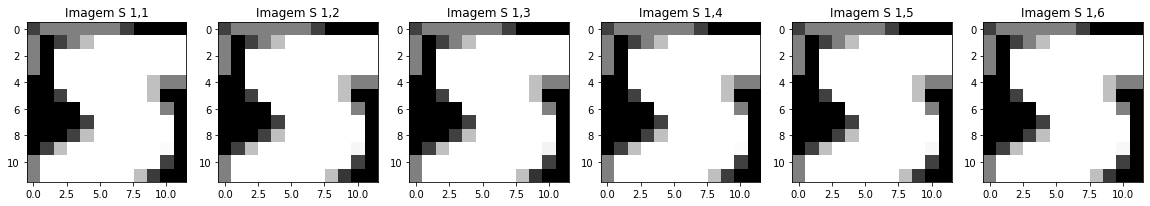

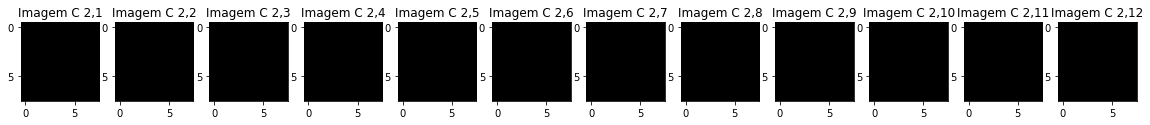

In [12]:
#metódo de convolução da camada C2
def convolution_C2( S1, k2, b2 ):
  
  c2 = np.zeros((8, 8, 12))
  for p in range(0, 6):
    for q in range(0, 12):
      c2[:,:,q] = convolution2d( S1[:,:,p], k2[:,:,p,q], b2[:,q] ) + c2[:,:,q];
  
  return c2;

##################################################

plt.figure(figsize=(20,10))
for i in range(0, S1[0,0,:].size ):
  plt.subplot(1, S1[0,0,:].size, i+1)
  plt.imshow(S1[:,:,i], cmap='gray')
  plt.title('Imagem S 1,'+str(i+1))
  
plt.plot();
  

C2 = convolution_C2(S1, k2, b2)

plt.figure(figsize=(20,10))
for i in range(0, C2[0,0,:].size ):
  plt.subplot(1, C2[0,0,:].size, i+1)
  plt.imshow(C2[:,:,i], cmap='gray')
  plt.title('Imagem C 2,'+str(i+1))
  
plt.plot()




### Pooling da camada C2

---


$$  S^{2}_{q}(i, j) = \frac{1}{4} \sum^{1}_{u=0} \sum^{1}_{v=0} {C}^{2}_{q}  \left ( 2i - u, 2j - v \right ), i, j = 1, 2, 3, 4.  $$

O pooling aqui consiste em somar os valores dos pixels de blocos com dimensões de 2x2 pixel e tirar a média deste valor. Logo, as imagens da camda C2, que possum dimensão 8x8, após o polling, passam a ter dimensão de 4x4 pixels.

[]

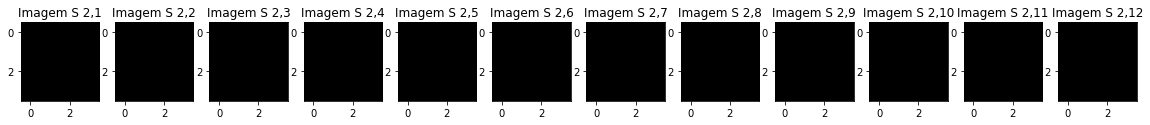

In [14]:
# realiza Pooling das imagens da camada C2
def pooling_C2(C2):
  
  s2 = np.zeros((4,4, 12))
  
  for q in range(0, 12):
    for i in range(0, 4):
      for j in range(0, 4):
        for u in range(0, 2):
          for v in range(0, 2):
            s2[i, j, q] = C2[ 2*i - u, 2*j - v, q ] + s2[i, j, q];        
  
  s2 = s2 * 1/4
  
  return s2

########################################################################

S2 = pooling_C2(C2)

plt.figure(figsize=(20,10))
for i in range(0, S2[0,0,:].size ):
  plt.subplot(1, S2[0,0,:].size, i+1)
  
  plt.imshow(S2[:,:,i], cmap='gray')
  
  plt.title('Imagem S 2,'+str(i+1))
  
plt.plot()

### Vetorização e Concatenação

---



Cada $S^{2}_{q}$ é uma matriz 4x4, onde $ q = 1, 2, 3, ... 12. $ Cada matriz é transformada em um vetor de 16 posições. No passo seguinte, os 12 vetores são concatencados, formando um vector maior de 192 posições (4 X 4 X 12 = 192). Este processo pode ser denotado por:

$$ f = F \left ( \{  S^{2}_{q} \}_{q = 1,2,3,4,  ...  , 12} \right )  $$

e o processo reverso por:

$$  \{  S^{2}_{q} \}_{q = 1,2,3,4,  ...  , 12} = F^{-1} (f)  $$

In [15]:
#muda as matrizes para vetores
F = S2.reshape(16,1,12)

#concatena todos os vetores
f = np.concatenate(F[:,:,:], axis=1).T

f

array([[6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],

### Camada FC (Fully Conected) - Saída da rede


---



$$ \hat{y} = \sigma( W \times f + b  )  $$


A saída da rede se dá pelo sigma resultante da multiplicação do pesos $W$ por $f$, somados aos valores de bias.

In [16]:
#calulo da saída da rede
y_hat = sigma(np.dot(W, f) + b)

y_hat

array([[1.00000000e+00],
       [1.40502655e-07],
       [6.37881675e-34],
       [2.36125551e-23],
       [3.86901451e-04],
       [1.00000000e+00],
       [7.90994666e-41],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99999996e-01]])

### Função de perda


---


Assumindo que o valor esperado é o $y$, a função de perda é dada por:

$$ L = \frac{1}{2} \sum_{i=1}^{10} ( \hat{y}(i) - y(i) )^{2} $$




In [17]:
y = np.random.uniform(1,0,(10,1))

#calcula o valor de perda
diff =  (y_hat - y) * (y_hat - y)
L = 1/2 * np.sum(diff)

L

1.6645299905184614

## Backpropagation


---



---



No backpropagation os parametros são atualizados do final para o início, isto é $W$ e $b$,  $k^{2}_{p,q}$ e $b^{2}_{q}$,  $k^{1}_{1, p}$ e $b^{1}_{ p}$.

### O vetor de pesos W
 

---



O vetor de pesos $W$ tem dimensão de $10 x 192$. Os seus valores são atualizados de acordo a derivada dos pesos em relação a função de perda ($L$). Assim temos:

$$ \Delta W(i, j) =  \frac{\delta L}{ \delta W(i, j) } $$

Como o valor de $L$ passa pela função de saída $\hat{y}$, temos:

$$ \Delta W(i, j) =  \frac{\delta L}{ \delta \hat{y}(i) }\cdot \frac{ \hat{y}(i) }{ \delta W(i, j) } $$

Substituindo as funções e derivando...

$$ \Delta W(i, j) = (\hat{y}(i) - y(i)) \cdot \frac{ \delta \sigma \left ( \sum_{j=1}^{192} W(i,j) \times f(j) + b(i) \right )  }{ \delta W(i, j) } $$

$$ \Delta W(i, j) = (\hat{y}(i) - y(i)) \cdot \hat{y}(i) ( 1 - y(i) ) \cdot f(j) $$

Como $\Delta \hat{y}(i) = (\hat{y}(i) - y(i)) \cdot \hat{y}(i) ( 1 - y(i) )  $ tem dimensão de 10 x 1, então:

$$ \Delta W(i, j) =\Delta \hat{y}(i) \cdot f(j)  $$

$$ \Longrightarrow \Delta W(i, j) =\Delta \hat{y}(i) \cdot f^T  \Longleftarrow $$ 



In [18]:
#calcula a variação do y de saida
delta_y_hat = (y_hat - y) * y_hat*(1-y)


#calcula a variação de W conforme a sua derivada
delta_W = np.dot(delta_y_hat, f.T)

### O vetor de pesos b

---



O vetor de pesos $b$ tem dimensão de $10 x 1$. Os seus valores TAMBÉM são atualizados de acordo a derivada dos pesos em relação a função de perda ($L$). Assim temos:

$$ \Delta b(i) =  \frac{\delta L}{ \delta b(i) } $$

Como o valor de $L$ passa pela função de saída $\hat{y}$, temos:

$$ \Delta b(i) =  \frac{\delta L}{ \delta \hat{y}(i) }\cdot \frac{ \hat{y}(i) }{ \delta b(i) } $$

Substituindo as funções e derivando...

$$ \Delta b(i) = (\hat{y}(i) - y(i)) \cdot \frac{ \delta \sigma \left ( \sum_{j=1}^{192} W(i,j) \times f(j) + b(i) \right )  }{ \delta b(i) } $$

$$ \Delta b(i) = (\hat{y}(i) - y(i)) \cdot \hat{y}(i) ( 1 - y(i) ) $$


$$ \Longrightarrow \Delta b =\Delta \hat{y} \Longleftarrow $$ 

In [19]:
#calculando a variação do bias (b)
delta_b = delta_y_hat;

### Os pesos de $\Delta k^{2}_{p,q}$

---




A matriz de pesos $\Delta k^{2}_{p,q}$ tem dimensão de 5x5. Devido as fases de concatenação, vetorização e *pooling*, é necesário calcular a variação de $\Delta C^{2}_{q} $ sobre  a camada C2 antes de calcular $\Delta k^{2}_{p,q}$.

Estes valores influenciaram nos valores de $f(j)$. Assim sendo, temos:

$$ \Delta f(j) =  \frac{\delta L}{ \delta f } $$

$$ \Delta f(j) =  \sum^{10}_{i=1} \frac{\delta L}{ \delta \hat{y}(i) }\cdot \frac{ \hat{y}(i) }{ \delta f(j) } $$

Substituindo as funções e derivando...

$$ \Delta f(j) = \sum^{10}_{i=1} (\hat{y}(i) - y(i)) \cdot \frac{ \delta \sigma \left ( \sum_{j=1}^{192} W(i,j) \times f(j) + b(i) \right )  }{ \delta f(j) } $$

$$ \Delta f(j) = \sum^{10}_{i=1} (\hat{y}(i) - y(i)) \cdot \hat{y}(i) ( 1 - y(i) ) \cdot W(i,j) $$

$$ \Longrightarrow \Delta f = W^{T} \times \Delta \hat{y} \Longleftarrow $$ 

Na vetorização e concatenção - transição da camada S2 para a camada FC -  nós redimensionamos os 12 mapas de dimensão 4x4 em um grande vetor $f$ com dimensão de 192x1 ( 4 x 4 x 12 = 192 ). O seu processo reverso é dado por:

$$  \{ \Delta  S^{2}_{q} \}_{q = 1,2,3,4,  ...  , 12} = F^{-1} (\Delta f)  $$ 

que recebe o erro da camada S2. Como não há parâmetros na camada S2, não precisamos fazer nenhum derivação. Portanto, é necessário apenas o *upsampling* ( *upsampling* = processo inverso ao *pooling*) para obter o erro na camada C2. Este processo é denotado por:

$$  \Delta C^{2}_{q}(i,j) = \frac{1}{4} \Delta S^{2}_{q} ( \lceil i/2	\rceil ,   	\lceil j/2 \rceil  ), $$ 

onde $ i e  j = 1, 2, ... , 8 $ e  	$\lceil  \cdot	\rceil$ denota a função de teto de $\cdot$.
Lembre-se que as dimensões de $\Delta  S^{2}_{q}$ e $ \Delta C^{2}_{q}$ são 4x4 e 8x8, respectivamente.

Após observado o exposto acima, podemos calcular os valores de $\Delta k^{2}_{p,q}$.

$$ \Delta k^{2}_{p,q}(u ,v) =  \frac{\delta L}{ \Delta k^{2}_{p,q}(u ,v) } $$

$$  \Delta k^{2}_{p,q}(u ,v) =   \sum^{8}_{i=1} \sum^{8}_{j=1} \frac{\delta L}{ \delta C^{2}_{q}(i,j) }\cdot \frac{ \delta C^{2}_{q}(i,j) }{ \delta k^{2}_{p,q}(u ,v) } $$

Substituindo as funções e derivando...

$$ \Delta  k^{2}_{p,q}(u ,v) =  \sum^{8}_{i=1} \sum^{8}_{j=1} \Delta C^{2}_{q}(i,j) \cdot \frac{ \delta \sigma \left ( \sum^{6}_{p=1} \sum^{2}_{u=-2} \sum_{v=-2}^{2} S^{1}_{p}(i - u, j - v) \times  k^{2}_{p,q}(u ,v)  + b^{2}_{q} \right )  }{  \delta k^{2}_{p,q}(u ,v) } $$

$$ \Delta  k^{2}_{p,q}(u ,v)  = \sum^{8}_{i=1} \sum^{8}_{j=1} \underbrace{ \Delta C^{2}_{q}(i,j) \cdot  C^{2}_{q}(i,j) ( 1 - C^{2}_{q}(i,j) ) } \cdot S^{1}_{p}(i - u, j - v)  \\ \Delta C^{2}_{q, \sigma}(i,j) $$

Assim temos que: 

$$ \Delta  k^{2}_{p,q}(u ,v) =  \Delta  C^{2}_{q, \sigma}  * S^{1}_{p} $$ 

Todavia, é necessário um ajuste para que a convolução aconteça da direita para esquerda e debaixo para cima, ou seja, no sentido contrário da no momento da propagação do sinal (*feedforward*). 
Para que isso aconteça, basta realizar um giro na imagem em 180° graus. Conforme mostra a figura abaixo. Nesta codinção, você pode convoluir na mesma direção utilizado na fase de propagação.

![Esquema da rotação da imagem durante o brackpropagtion](https://lh5.googleusercontent.com/Xh0yI6H47Ca7cFJ1yrNPrBm1Q4_B2gwifkrfNwU6-Sv2wM3ezZZrlno0uRxXJhYBBPXu91cD5eYpaW5VARNV=w1325-h616)

Rotacionando $S^{1}_{p}$ em 180 graus, obtemos  $S^{1}_{p, rot180}$, portanto $S^{1}_{p, rot180} (u -i, v - j) = S^{1}_{p} (i - u, j - v)$. Assim sendo,  $\Delta  k^{2}_{p,q}(u ,v)$ pode ser escrito por:

$$ \Delta  k^{2}_{p,q}(u ,v) =  \sum^{8}_{i=1} \sum^{8}_{j=1}  S^{1}_{p, rot180} (u -i, v - j) \cdot \Delta C^{2}_{q,\sigma}(i,j) $$ 
 
$$ \Longrightarrow \Delta  k^{2}_{p,q}(u ,v) = S^{1}_{p, rot180} * \Delta  C^{2}_{q, \sigma} \Longleftarrow $$ 


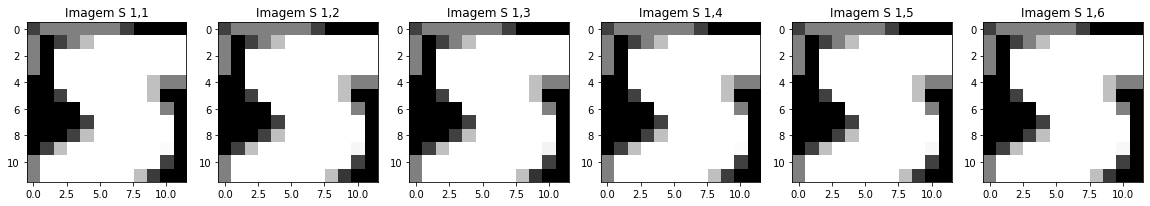

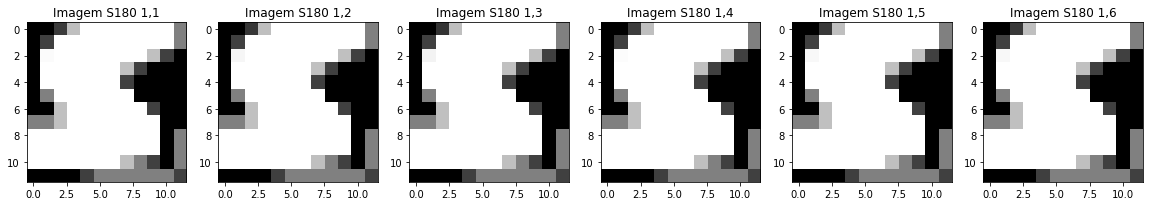

In [21]:
#calcular os valores de delta f
delta_f = np.dot(W.T, delta_y_hat)

#calcular os valores de delta s2
delta_s2 = delta_f.reshape(4, 4, 12)

#calcula os valores de delta C2
delta_c2 = np.zeros((8, 8, 12))

for q in range(0, 12): #numero de kernels
  for i in range(1, 8):
    for j in range(1, 8):
      idx_i = int(np.ceil(i/2)) - 1;
      idx_j = int(np.ceil(j/2)) - 1;
      delta_c2[i, j, q] = 1/4 * delta_s2[ idx_i, idx_j, q ]

delta_c2_sigma = delta_c2 * C2 * (1 - C2)
      
#rotaciona a imagem S1 em 180º (2 x rotações de 90)
S1_180 = np.rot90(S1, 2)


#mostra imagem antes de rotacionar
plt.figure(figsize=(20,10))
for i in range(0, S1[0,0,:].size ):
  plt.subplot(1, S1[0,0,:].size, i+1)
  plt.imshow(S1[:,:,i], cmap='gray')
  plt.title('Imagem S 1,'+str(i+1))
  
plt.plot();

#mostra imagem depois de rotacionar
plt.figure(figsize=(20,10))
for i in range(0, S1_180[0,0,:].size ):
  plt.subplot(1, S1_180[0,0,:].size, i+1)
  plt.imshow(S1_180[:,:,i], cmap='gray')
  plt.title('Imagem S180 1,'+str(i+1))
  
plt.plot();


#calcula os valores de delta K2
delta_k2 = np.zeros((5, 5, 6, 12))
for p in range(0, 6):
  for q in range(0, 12):
    delta_k2[:,:,p,q] = convolution2d( S1_180[:,:,p], delta_c2_sigma[:,:,q], 0 ) + delta_k2[:,:,p,q];
      

### O peso $\Delta b^{2}_{q}$

---

O vetor tem dimensão de 1x1 para cada uma dos 12 *kernels*  $k^{2}$ ($q = 1, 2, 3, ... , 12$)

$$ \Delta b^{2}_{q} =  \frac{\delta L}{ \Delta b^{2}_{q} } $$

$$  \Delta b^{2}_{q} =   \sum^{8}_{i=1} \sum^{8}_{j=1} \frac{\delta L}{ \delta C^{2}_{q}(i,j) }\cdot \frac{ \delta C^{2}_{q}(i,j) }{ \delta b^{2}_{q} } $$

Substituindo as funções e derivando...

$$ \Delta  b^{2}_{q} =  \sum^{8}_{i=1} \sum^{8}_{j=1} \Delta C^{2}_{q}(i,j) \cdot \frac{ \delta \sigma \left ( \sum^{6}_{p=1} \sum^{2}_{u=-2} \sum_{v=-2}^{2} S^{1}_{p}(i - u, j - v) \times  k^{2}_{p,q}(u ,v)  + b^{2}_{q} \right )  }{  \delta b^{2}_{q} } $$

$$ \Delta  b^{2}_{q}  = \sum^{8}_{i=1} \sum^{8}_{j=1} \underbrace{ \Delta C^{2}_{q}(i,j) \cdot  C^{2}_{q}(i,j) ( 1 - C^{2}_{q}(i,j) ) }  \\ \Delta C^{2}_{q, \sigma}(i,j) $$

Assim temos que: 

$$ \Longrightarrow \Delta  b^{2}_{q} =  \sum^{8}_{i=1} \sum^{8}_{j=1}  \Delta  C^{2}_{q, \sigma} (i, j) \Longleftarrow $$ 

In [22]:
#calcula os valores de delta b2
delta_b2 = np.zeros(12)

for q in range(0, 12): #numero de kernels k2
  delta_b2[q] = np.sum(delta_c2_sigma[:, :, q])

### Os pesos de $\Delta k^{1}_{1, p}$


---

Similiar a derivação do $\Delta k^{2}_{p,q}$, precisamos primeiramente obter o $\Delta S^{1}_{p}$, o erro da camada S1. Então, o *upsampling* será realizado para obter o $\Delta C^{1}_{p} $, o erro da camada C1. Por fim, seguindo o mesmo caminho, podemos calcular o valor de $\Delta k^{1}_{1, p}$.

$$ \Delta S^{1}_{p}(i, j) = \frac{\delta L }{ \Delta S^{1}_{p}(i, j) } $$

$$ \Delta S^{1}_{p}(i, j) = \sum^{12}_{q=1} \sum^{2}_{u=-2} \sum^{2}_{v=-2} \frac{\delta L }{ \delta C^{2}_{q,\sigma}(i + u, j + v) } \cdot \frac{ \delta C^{2}_{q,\sigma}(i + u, j + v) }{\delta S^{1}_{p}(i, j)} $$

$$ \Delta S^{1}_{p}(i, j) = \sum^{12}_{q=1} \sum^{2}_{u=-2} \sum^{2}_{v=-2} \Delta C^{2}_{q,\sigma}(i + u, j + v) \cdot  \frac{ \delta \left ( \sum^{6}_{p=1} \sum^{2}_{u=-2} \sum_{v=-2}^{2} S^{1}_{p}(i + u, j + v) \times  k^{2}_{p,q}(u ,v)  + b^{2}_{q} \right )  }{  \delta S^{1}_{p, q}(i, j) } $$

$$ \Delta S^{1}_{p}(i, j) = \sum^{12}_{q=1} \sum^{2}_{u=-2} \sum^{2}_{v=-2} \Delta C^{2}_{q,\sigma}(i + u, j + v) \cdot   k^{2}_{p,q}(u ,v) $$

Rotacinando $ k^{2}_{p,q} $ em 180 graus, obtemos $ k^{2}_{p,q,rot180}(-u, -v) = k^{2}_{p,q}(u ,v) $. Desde modo:

$$ \Delta S^{1}_{p}(i, j) = \sum^{12}_{q=1} \sum^{2}_{u=-2} \sum^{2}_{v=-2} \Delta C^{2}_{q,\sigma}(i - (- u), j - (-v)) \cdot   k^{2}_{p,q}(-u, -v) $$

Então:

$$ \Longrightarrow \Delta S^{1}_{p}(i, j) = \sum^{12}_{q=1} \Delta C^{2}_{q,\sigma} *   k^{2}_{p,q,rot180} \Longleftarrow $$

Pelo *upsampling*, obtemos o erro sobre a camada C1,

$$ \Delta C^{1}_{p}(i,j) = \frac{1}{4} \Delta S^{1}_{p} ( \lceil i/2	\rceil ,   	\lceil j/2 \rceil  ), \\ i, j = 1, 2, 3, ... , 24. $$

Agora, estamos prontos para calcular o $ \Delta k^{1}_{1,p} $,

$$ \Delta k^{1}_{1,p}(u, v) = \frac{\delta L}{ \delta k^{1}_{1,p}(u, v) } $$

$$ \Delta k^{1}_{1,p}(u, v) = \sum^{24}_{i=1} \sum^{24}_{j=1} \frac{\delta L}{ \delta C^{1}_{p}(i,j) }\cdot \frac{ \delta C^{1}_{p}(i,j) }{ \delta k^{1}_{1,p} (u,v) } $$

$$ \Delta k^{1}_{1,p}(u, v) = \sum^{24}_{i=1} \sum^{24}_{j=1} \Delta C^{1}_{p}(i, j) \cdot  \frac{ \delta \sigma \left ( \sum^{2}_{u=-2} \sum_{v=-2}^{2} I(i - u,  j - v) \cdot  k^{1}_{1,p}(u ,v)  + b^{1}_{p} \right )  }{  \delta k^{1}_{1,p}(u, vj) }$$


$$ \Delta k^{1}_{1,p}(u, v) = \sum^{24}_{i=1} \sum^{24}_{j=1} \underbrace{ \Delta C^{1}_{p}(i,j) \cdot  C^{1}_{p}(i,j) ( 1 - C^{1}_{p}(i,j) ) }  \cdot  I(i - u, j - v) \\ \Delta C^{1}_{p, \sigma}(i,j) $$

Pela mesma razão discutida anteriormente, rotacinamos a Imagens em 180 graus:

$$ \Delta k^{1}_{1,p}(u, v) = \sum^{24}_{i=1} \sum^{24}_{j=1} I_{rot180}(u - i, v - j)  \cdot \Delta C^{1}_{p, \sigma}(i,j) $$

Finalmente,

$$ \Longrightarrow \Delta k^{1}_{1,p} = I_{rot180} * \Delta C^{1}_{p, \sigma} \Longleftarrow $$




In [24]:
#rotaciona a imagem k2 em 180º (2 x rotações de 90)
k2_180 = np.rot90(k2, 2)

#convolução de delta_c2 com k2_180
delta_S1 = np.zeros((12, 12, 6))

for p in range(0, 6):
  for q in range(0, 12):
    # aqui é necessário realizar um padding (adição de bordas) na matriz delta_c2_sigma
    # essa parte não é deixda clara no artigo
    # lembrando que a dimensão resultante da convolução é X - m + 1, onde X é a dimensão da img
    # e o m é o tamanho do kernel. Assim, delta_c2_sigma = 16x16
    delta_c2_sigma_padding = np.pad(delta_c2_sigma[:,:,q], 4, mode='constant')
    delta_S1[:,:,p] = convolution2d( delta_c2_sigma_padding, k2_180[:,:,p,q], 0 ) + delta_S1[:,:,p];
    
#calcula o valor delta_c1
delta_c1 = np.zeros((24,24, 6))
for p in range(0, 6): #numero de kernels
  for i in range(1, 24):
    for j in range(1, 24):
      idx_i = int(np.ceil(i/2)) - 1;
      idx_j = int(np.ceil(j/2)) - 1;
      delta_c1[i, j, p] = 1/4 * delta_S1[ idx_i, idx_j, p ]

#calcula delta_c1_sigma
delta_c1_sigma = delta_c1 * C1 * (1 - C1)


#rotaciona a imagem de entrada
I_180 = np.rot90(I, 2)

#calcula o delta_k1
delta_k1 = np.zeros((5,5,6))
for p in range(0, 6):
  delta_k1[:,:,p] = convolution2d(I_180, delta_c1_sigma[:,:,p], 0 ) + delta_k1[:,:,p]




### O peso $\Delta b^{1}_{p}$

---

O vetor tem dimensão de 1x1 para cada uma dos 6 *kernels*  $k^{1}$ ($p = 1, 2, 3, ... , 6$)

$$ \Delta b^{1}_{p} =  \frac{\delta L}{ \Delta b^{1}_{p} } $$

$$  \Delta b^{1}_{p} =   \sum^{24}_{i=1} \sum^{24}_{j=1} \frac{\delta L}{ \delta C^{1}_{p}(i,j) }\cdot \frac{ \delta C^{1}_{p}(i,j) }{ \delta b^{1}_{p} } $$

Substituindo as funções e derivando...

$$ \Delta  b^{1}_{p} =  \sum^{24}_{i=1} \sum^{24}_{j=1} \Delta C^{1}_{p}(i,j) \cdot \frac{ \delta \sigma \left ( \sum^{2}_{u=-2} \sum_{v=-2}^{2} I(i - u, j - v) \times  k^{1}_{1,p}(u ,v)  + b^{1}_{p} \right )  }{  \delta b^{1}_{p} } $$

$$ \Delta  b^{1}_{p}  = \sum^{24}_{i=1} \sum^{24}_{j=1} \underbrace{ \Delta C^{1}_{p}(i,j) \cdot  C^{1}_{p}(i,j) ( 1 - C^{1}_{p}(i,j) ) }  \\ \Delta C^{1}_{p, \sigma}(i,j) $$

Assim temos que: 

$$ \Longrightarrow \Delta  b^{1}_{p} =  \sum^{24}_{i=1} \sum^{24}_{j=1}  \Delta  C^{1}_{p, \sigma} (i, j) \Longleftarrow $$ 

In [25]:
#calcula o delta_b1
delta_b1 = np.zeros(6)

for p in range(0, 6):
  delta_b1[p] = np.sum(delta_c1_sigma[:,:,p])

### Atualização dos parametros

Para essa etapa é necessário uma variável para definir o tamanho do passo do apresendizado. Está é a variável $\alpha $. Este valor deve ser maior que zero e menor ou igual a um. $(0 < \alpha \le 1)$.


$$ k^{1}_{1, p} =  k^{1}_{1, p} - \alpha \cdot \Delta k^{1}_{1, p} \\ $$

$$ b^{1}_{p} =  b^{1}_{p} - \alpha \cdot \Delta b^{1}_{p} \\ $$

$$ k^{2}_{p, q} =  k^{2}_{p, q} - \alpha \cdot \Delta k^{2}_{p, q} \\ $$

$$ b^{2}_{q} =  b^{2}_{q}  - \alpha \cdot \Delta b^{2}_{q} \\ $$

$$ W =  W - \alpha \cdot \Delta W\\ $$

$$ b =  b - \alpha \cdot \Delta b\\ $$



 -> Kernels da primeira camada (C1) <-


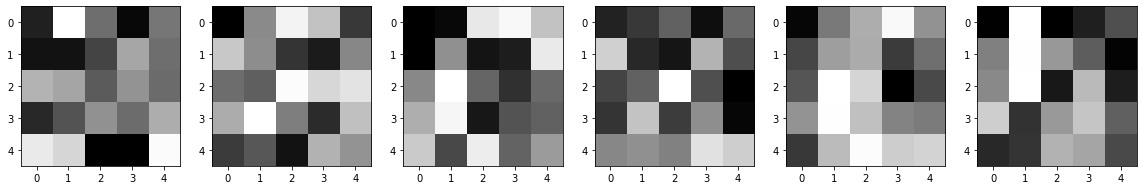

In [26]:
#atualiza os parametros
alpha = 0.5

k1 = k1 - alpha * delta_k1
b1 = b1 - alpha * delta_b1
k2 = k2 - alpha * delta_k2
b2 = b2 - alpha * delta_b2
W = W - alpha * W
b = b - alpha * b

#plotando os kernels da primeira camada (C1)
plt.figure(figsize=(20,10))
print('\n -> Kernels da primeira camada (C1) <-')
for i in range(0, 6):
  plt.subplot(1,6,i+1)
  plt.imshow(k1[:,:,i], cmap='gray')